In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # suppress warnings for readability

In [16]:
# Import churn.csv 
telco = pd.read_csv('../data/churn_data.csv')
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


### EDA

In [17]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [18]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [19]:
telco.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [20]:
telco['Churn'].value_counts()

Churn
no     2850
yes     483
Name: count, dtype: int64

In [21]:
# Group telco by 'Churn' and compute the mean
telco.groupby(['Churn']).mean(numeric_only=True)

# Adapt your code to compute the standard deviation
telco.groupby(['Churn']).std(numeric_only=True)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,39.88235,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
yes,39.46782,11.860138,68.997792,51.728910,47.132825,2.793190,1.853275,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270


In [22]:
# Count the number of churners and non-churners by State
telco.groupby('State')['Churn'].value_counts()

# Filter the data to show only California
telco[telco['State'] == 'CA'].groupby('State')['Churn'].value_counts()

State  Churn
CA     no       25
       yes       9
Name: count, dtype: int64

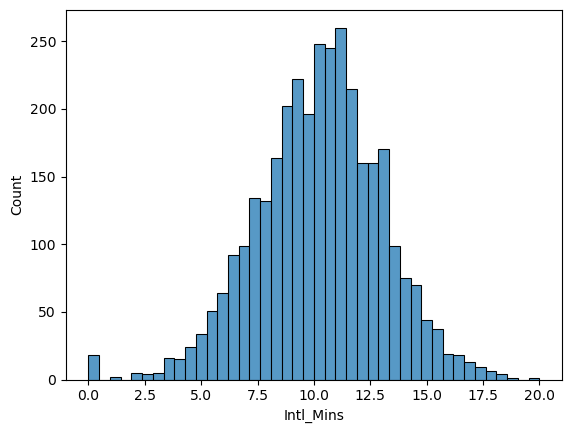

In [23]:
# Visualize the distribution of 'Intl_Mins'
sns.histplot(telco['Intl_Mins'])

# Display the plot
plt.show()

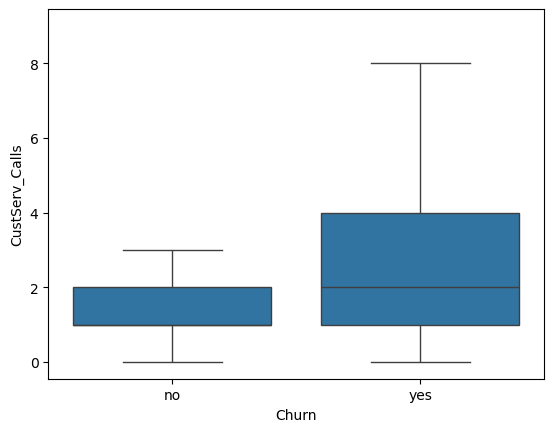

In [24]:
# Add "Intl_Plan" as a third variable
sns.boxplot(x = 'Churn',
            y = 'CustServ_Calls',
            data = telco,
            fliersize = 0, # Remove outliers
            # hue = "Intl_Plan" # Add third variable
            )

# Display the plot
plt.show()

### Data Preprocessing
#### Encoding Binary Features

In [25]:
pd.set_option('future.no_silent_downcasting', True)

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
# telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1})
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no': 0 , 'yes': 1}).infer_objects(copy=False)

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
# telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1})
telco['Churn'] = telco['Churn'].replace({'no': 0 , 'yes': 1}).infer_objects(copy=False)

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


#### Encoding Categorical Features using One-Hot Encoding

In [26]:
telco_state = pd.get_dummies(telco, columns=['State'], drop_first=True)
telco_state

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,no,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,no,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,no,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,yes,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,yes,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,no,1,...,False,False,False,False,False,False,False,False,False,False
3329,68,0,231.1,153.4,191.3,9.6,3,0,no,0,...,False,False,False,False,False,False,False,False,True,False
3330,28,0,180.8,288.8,191.9,14.1,2,0,no,0,...,False,False,False,False,False,False,False,False,False,False
3331,184,0,213.8,159.6,139.2,5.0,2,0,yes,0,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])

#### Feature Scaling using Standardization

In [28]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for scaling
numeric_cols = telco.select_dtypes(include=['float64', 'int64']).columns

# Scale telco
telco_scaled = StandardScaler().fit_transform(telco[numeric_cols])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=numeric_cols)

# Print summary statistics
print(telco_scaled_df.describe())

       Account_Length  Vmail_Message      Day_Mins      Eve_Mins  \
count    3.333000e+03   3.333000e+03  3.333000e+03  3.333000e+03   
mean     1.470971e-16   7.035077e-17  7.312216e-16 -6.821892e-17   
std      1.000150e+00   1.000150e+00  1.000150e+00  1.000150e+00   
min     -2.513172e+00  -5.917599e-01 -3.301096e+00 -3.963622e+00   
25%     -6.797448e-01  -5.917599e-01 -6.624241e-01 -6.780300e-01   
50%     -1.627644e-03  -5.917599e-01 -6.887677e-03  8.276141e-03   
75%      6.513740e-01   8.695542e-01  6.725198e-01  6.768330e-01   
max      3.564766e+00   3.134591e+00  3.140422e+00  3.209066e+00   

         Night_Mins     Intl_Mins  CustServ_Calls         Churn     Intl_Plan  \
count  3.333000e+03  3.333000e+03    3.333000e+03  3.333000e+03  3.333000e+03   
mean   7.887813e-17 -3.336332e-16    8.527366e-18  5.542788e-17 -4.796643e-17   
std    1.000150e+00  1.000150e+00    1.000150e+00  1.000150e+00  1.000150e+00   
min   -3.513648e+00 -3.667413e+00   -1.188218e+00 -4.116718e-01

In [29]:
# Select only the "Intl_Calls" and "Night_Mins" columns
selected_cols = ['Intl_Calls', 'Night_Mins']
telco_selected_scaled_df = telco_scaled_df[selected_cols]
telco_selected_scaled_df.describe()

,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-8.527366e-18,7.887813e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


#### Feature Selection

In [30]:
# Drop the unnecessary features
telco = telco.drop(telco[['Area_Code','Phone']], axis=1)

# Verify dropped features
print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')


In [31]:
telco = telco.drop(telco[['State']], axis=1)

In [32]:
# Select only numeric columns for correlation computation
numeric_telco = telco.select_dtypes(include=['float64', 'int64'])
numeric_telco.corr()  # Identify correlated features

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276


In [33]:
# Compute the correlation matrix
corr_matrix = numeric_telco.corr().abs()

# Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,NaN,0.004628,0.006216,0.006757,0.008955,0.009514,0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,0.006745,0.013176,0.008960,0.020661,0.009546
Vmail_Message,NaN,NaN,0.000778,0.017562,0.007681,0.002856,0.013263,0.089728,0.008745,0.956927,0.009548,0.000776,0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,NaN,NaN,NaN,0.007043,0.004323,0.010155,0.013423,0.205151,0.049396,0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,0.010092
Eve_Mins,NaN,NaN,NaN,NaN,0.012584,0.011035,0.012985,0.092796,0.019100,0.021545,0.021451,0.007050,0.011430,1.000000,0.007586,0.012593,0.002541,0.011067
Night_Mins,NaN,NaN,NaN,NaN,NaN,0.015207,0.009288,0.035493,0.028905,0.006079,0.022938,0.004324,0.002093,0.012592,0.011204,0.999999,0.012353,0.015180
Intl_Mins,NaN,NaN,NaN,NaN,NaN,NaN,0.009640,0.068239,0.045871,0.001318,0.021565,0.010157,0.008703,0.011043,0.013605,0.015214,0.032304,0.999993
CustServ_Calls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208750,0.024522,0.017824,0.018942,0.013427,0.002423,0.012987,0.012802,0.009277,0.017561,0.009675
Churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259852,0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,0.052844,0.068259
Intl_Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,0.028913,0.017366,0.045780
Vmail_Plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011086,0.001686,0.006444,0.021559,0.015553,0.006064,0.007618,0.001276


In [34]:
# Find features with correlation greater than a specified threshold (e.g., 0.8)
threshold = 0.8
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
to_drop

['Vmail_Plan', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']

In [35]:
# # Drop the highly correlated features
# numeric_telco_filtered = numeric_telco.drop(columns=to_drop)

# # Display the filtered dataframe
# numeric_telco_filtered.head()

In [36]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins'] / telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


### Churn Prediction
#### Model Selection
* Logistic Regression: Good baseline, interpretable.
* Random Forests: Captures complex relationships.
* Support Vector Machines (SVMs): Effective with high-dimensional data.

In [37]:
# Define the features
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Day_Calls', 'Eve_Calls', 'Night_Calls', 'Intl_Calls']

# Define a new customer for prediction
new_customer = pd.DataFrame({
	'Account_Length': [100],
	'Vmail_Message': [20],
	'Day_Mins': [200],
	'Eve_Mins': [150],
	'Night_Mins': [180],
	'Intl_Mins': [10],
	'CustServ_Calls': [2],
	'Day_Calls': [100],
	'Eve_Calls': [100],
	'Night_Calls': [100],
	'Intl_Calls': [5],
	# 'Area_Code': [415]
})

In [38]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


In [39]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


#### Model Evaluation

In [40]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(len(X_test))

(2333, 18)
(1000, 18)
1000


In [42]:
from sklearn.preprocessing import LabelEncoder

# # Encode 'Intl_Plan' column
# le = LabelEncoder()
# X_train['Intl_Plan'] = le.fit_transform(X_train['Intl_Plan'])
# X_test['Intl_Plan'] = le.transform(X_test['Intl_Plan'])

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.954


In [43]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[848   7]
 [ 39 106]]


In [44]:
# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

In [45]:
# Import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[572   5]
 [ 21  69]]


In [46]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Print the precision
print(precision_score(y_test, y_pred))

# Print the recall
print(recall_score(y_test, y_pred))

0.9512195121951219
0.6724137931034483


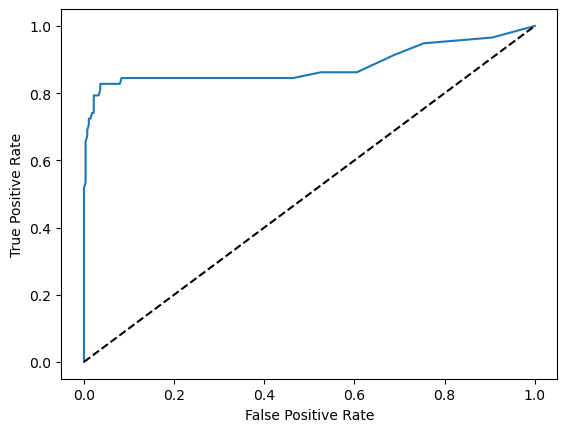

In [48]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [49]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.8809345327336333


In [50]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.7628865979381443


### Model Tuning

In [51]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)

{'max_features': 'sqrt'}


In [52]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3)

# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_) 

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}


In [53]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist, cv=3)

# Fit the model
random_search.fit(X, y)

# Print best parameters
print(random_search.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 6}


#### Feature Importance

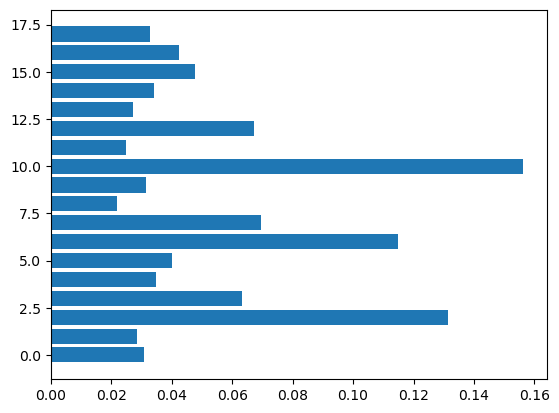

In [54]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances)
plt.show()

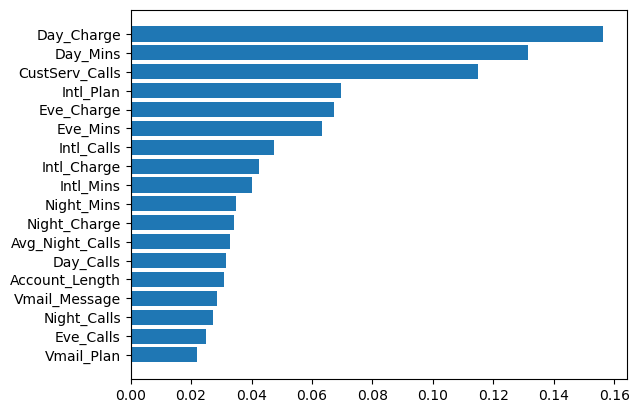

In [55]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [56]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Print the accuracy
print(clf.score(X_test, y_test))

0.949


In [57]:
# Import f1_score
from sklearn.metrics import f1_score

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8106060606060606
